In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#엑셀 데이터를 데이터프레임 변환
df = pd.read_excel('./data4/시도별 전출입 인구수.xlsx', fillna=0, header=0)
#누락값을 앞데이터로 채움 (엑셀 양식 병합부분) => 데이터의 특성에 따라 누락값 처리 방법은 다름
df = df.fillna(method='ffill')

In [30]:
# 부산에서 다른지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '부산광역시') & (df['전입지별'] != '서울특별시')
df_busan = df[mask]
# 방법 3가지 => 전출지별 행 없애기
df_busan = df_busan.drop(['전출지별'], axis=1)  #axis=1은 column
df_busan.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_busan.set_index('전입지', inplace=True)
df_busan.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,376059,328367,319360,414661,554013,694445,629165,696120,782978,734053,...,549106,549094,547800,532906,481652,496161,500802,520591,480407,467471
부산광역시,307900,248102,245789,316491,447094,490794,462171,511015,577302,534200,...,387878,391404,393530,376930,340468,358352,353282,376345,340521,321606
대구광역시,-,-,-,-,-,-,-,-,-,-,...,4922,4785,5066,4981,5225,5027,5300,4553,4616,4506
인천광역시,-,-,-,-,-,-,-,-,-,-,...,3544,3236,3230,3741,3180,2986,3143,3185,3092,2994
광주광역시,-,-,-,-,-,-,-,-,-,-,...,1300,1244,1338,1329,1430,1047,1856,1195,1100,1073


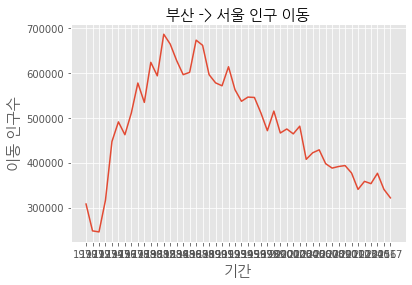

In [31]:
# 부산에서 서울로 이동한 인구 데이터 값만 선택
sr_one = df_busan.loc['부산광역시']  #=> type이 시리즈로 바뀜

# xy 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values) #=> 컬럼이아니라 인덱스로 plot 생성(타입 시리즈)

#판다스 객체를 plot 함수에입력
# plt.plot(sr_one)

import matplotlib.font_manager as fm
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=15)

# 차트 제목추가
plt.title('부산 -> 서울 인구 이동',fontproperties=fontprop)

# 축이름 추가
plt.xlabel('기간',fontproperties=fontprop)
plt.ylabel('이동 인구수',fontproperties=fontprop)
plt.show()  #변경사항 저장하고 그래프 출력

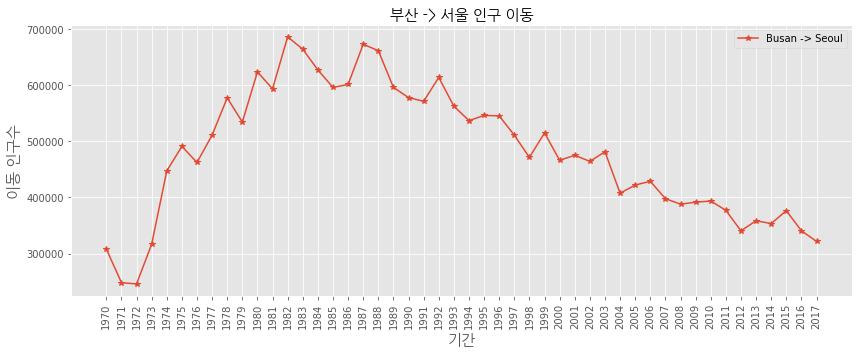

In [32]:
# 스타일 서식 지정
plt.style.use('ggplot')
# 그림 사이즈 지점(가로 14인치 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='*')

plt.title('부산 -> 서울 인구 이동',fontproperties=fontprop) #차트제목
plt.xlabel('기간',fontproperties=fontprop) #x축이름
plt.ylabel('이동 인구수',fontproperties=fontprop) #y축이름

plt.legend(labels =['Busan -> Seoul'],loc ='best')  #범례표시
plt.show()

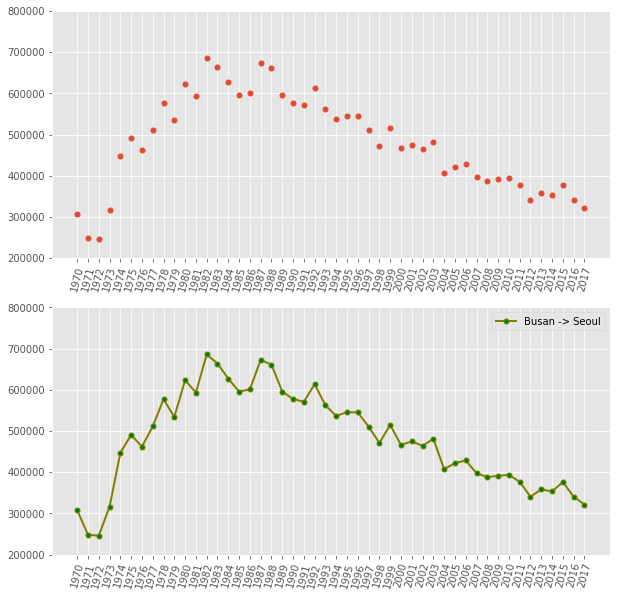

In [37]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=5)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=5, color='olive', linewidth=2, label='Busan -> Seoul')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(200000, 800000)
ax2.set_ylim(200000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

# 변경사항 저장하고 그래프 출력
plt.show()